Connected to factorization (Python 3.8.13)

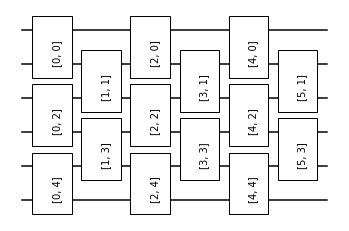

MZI address is  [2, 4]
Route to enter from left upper [(0, 2), (1, 3)]
Route to enter from _left_lower [(0, 4), (1, 5)]
Route to enter from _right_lower [(3, 5), (4, 4), (5, 3)]
Route to enter from _right_upper [(3, 3), (4, 2), (5, 1)]
[2, 4] [3, 1]


In [1]:
import numpy as np
import doctest
from qpyc.Mesh import ClementsMesh

# create a 6x6 Clements 
mesh = ClementsMesh(dimension=6) 
mesh.plot()

# pick a MZI and route it
# Route returns 1. a nested tuple, represent the device address of four ports; 2. the port to connect
# the coordinates not included is the edgem, eg. (1,5) 
mzi = mesh.devices[(2,4)]
print('MZI address is ', mzi.addr)
route_path_left_upper, route_path_left_lower, route_path_right_lower, route_path_right_upper,  ports_in, ports_out = mesh.Route(mzi.addr)

print('Route to enter from left upper', route_path_left_upper)
print('Route to enter from _left_lower', route_path_left_lower) 
print('Route to enter from _right_lower', route_path_right_lower)
print('Route to enter from _right_upper', route_path_right_upper)
print(ports_in, ports_out)

In [2]:
from qubib.adapters.LocalSerial import LocalSerial
from qubib.adapters.NetworkSocket import NetworkSocket
from qubib.devices.lfiber.OSW2x6 import OSW2x6
from qubib.devices.santec.MPM210H import MPM210H

adapter_osw = LocalSerial('COM3', baudrate=9600)
adapter_osw.read_termination = '>'
fiber_switch = OSW2x6(adapter_osw)

adapter_pm = NetworkSocket(host='10.42.0.107', port=5000)
pp = MPM210H(adapter_pm)
pp.set_unit(1)

fiber_switch.set(1, 0)
pp.read_power()

AttributeError: 'OSW2x6' object has no attribute 'set'

In [3]:

fiber_switch.set_channels(1, 0)
pp.read_power()

array([5.501154e-03, 1.054765e-02, 5.755345e-02, 2.673551e-03,
       5.346799e-02, 2.539217e-01, 6.703652e-08, 1.018573e-07])

In [4]:
plt.plot(pp.read_power())

NameError: name 'plt' is not defined

In [5]:
import matplotlib.pyplot asplt

SyntaxError: invalid syntax (<ipython-input-5-57a65d9a227a>, line 1)

In [6]:
import matplotlib.pyplot as plt

In [8]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading
q = None
osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

NameError: name 'osw' is not defined

In [9]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading

# osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q, osw=fiber_switch)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

calibrating (0, 0)


TypeError: SweepIV() got an unexpected keyword argument 'osw'

In [10]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading
# osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

calibrating (0, 0)


AttributeError: 'NoneType' object has no attribute 'v'

In [11]:
import qontrol
q = qontrol.QXOutput(serial_port_name = 'COM8', response_timeout = 4)
# assert q.n_chs == 32

SerialException: could not open port 'COM8': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [12]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading
# osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

calibrating (0, 0)


AttributeError: 'NoneType' object has no attribute 'v'

In [13]:
import qontrol
q = qontrol.QXOutput(serial_port_name = 'COM8', response_timeout = 4)
# assert q.n_chs == 32

SerialException: could not open port 'COM8': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [14]:
import qontrol
q = qontrol.QXOutput(serial_port_name = 'COM4', response_timeout = 4)
# assert q.n_chs == 32

In [15]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading
# osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

calibrating (0, 0)


TypeError: Attempt to set value to type <class 'numpy.float64'> is forbidden. Valid types are (<class 'int'>, <class 'float'>).

In [16]:
q.i[:]=0

In [17]:
# Start a Calibration
from qpyc.Cali import ClementsCali, cdt, RealPhaseShifter
from pycomo.Cali import sixmode_internal_pins, sixmode_external_pins

# create a empty calibration data structure
mesh = ClementsCali(6)
calidata_int = np.zeros(len(mesh.addrs), dtype=cdt)
calidata_int['addrs'] = mesh.addrs
calidata_int['pins'] = sixmode_internal_pins
calidata_int['time'] = np.datetime64('nat')

# hardware loading
# osw.read_power = None

for a in mesh.addrs[0:2]:
    print(f'calibrating {a}')
    ps = RealPhaseShifter(addr=(0,0), cal_data=calidata_int)
    # print(calidata_int[])
    # print(ps.SweepFitPhaseDummy(plot=True))
    ps.SweepIV(ps=q)
    # popt = ps.SweepFitPhase(ps=q, osw.read_power)
    # print(popt)    

calibrating (0, 0)


TypeError: Attempt to set value to type <class 'numpy.float64'> is forbidden. Valid types are (<class 'int'>, <class 'float'>).

In [18]:
calidata_int['addrs']

array([[0, 0],
       [0, 2],
       [0, 4],
       [1, 1],
       [1, 3],
       [2, 0],
       [2, 2],
       [2, 4],
       [3, 1],
       [3, 3],
       [4, 0],
       [4, 2],
       [4, 4],
       [5, 1],
       [5, 3]], dtype=uint8)

Restarted factorization (Python 3.8.13)

In [1]:
from qubib.adapters.LocalSerial import LocalSerial
from qubib.adapters.NetworkSocket import NetworkSocket
from qubib.devices.lfiber.OSW2x6 import OSW2x6
from qubib.devices.santec.MPM210H import MPM210H

adapter_osw = LocalSerial('COM3', baudrate=9600)
adapter_osw.read_termination = '>'
fiber_switch = OSW2x6(adapter_osw)

adapter_pm = NetworkSocket(host='10.42.0.107', port=5000)
pp = MPM210H(adapter_pm)
pp.set_unit(1)

fiber_switch.set_channels(1, 0)
# pp.read_power()

import qontrol
q = qontrol.QXOutput(serial_port_name = 'COM4', response_timeout = 4)

def pin_i(pin,i):
    q.i[pin] = i
    return None

def pin_v(pin,v):
    q.i[pin] = v
    return None

def switch(ch):
    fiber_switch.set_channels(ch+1,0)
    return None

In [2]:
switch(2)

In [3]:
pp.read_power()

array([5.253611e-02, 1.443634e-03, 1.962839e-02, 2.957415e-01,
       1.888641e-02, 6.980099e-05, 1.245299e-07, 1.221526e-07])

In [4]:
switch(0)

In [5]:
pp.read_power()

array([5.469145e-03, 1.064291e-02, 5.771906e-02, 1.849867e-03,
       5.379700e-02, 2.539507e-01, 1.217998e-07, 1.181225e-07])

In [6]:

def pm():
    return pp.read_power()[:6]

In [7]:
pm()

array([0.00557749, 0.01067719, 0.05729793, 0.00255515, 0.05320937,
       0.2514545 ])

In [8]:
switch(0)

In [9]:
pm()

array([0.00550248, 0.01072543, 0.05749859, 0.00251675, 0.05322821,
       0.2509598 ])